In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
# fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [4]:
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/{problem_name}_surface_and_contour-autumn.png'
# )

n_gpus: 0
cpu


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem spe

/Users/ryandevera/.virtualenvs/deeplifing/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║  - │   -   ║  0.37691715392 ║   -  │   -  ║ QN │     6 │ 0.031250 ║     1 │ 0.002172   ║ 
   3 ║  - │   -   ║  0.21371457618 ║   -  │   -  ║ QN │    13 │ 2.44e-04 ║     1 │ 0.002705   ║ 
   4 ║  - │   -   ║  0.20600095168 ║   -  │   -  ║ QN │    13 │ 2.44e-04 ║     1 │ 1.72e-04   ║ 
   5 ║  - │   -   ║  0.18748118046 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 3.93e-08   ║ 
   6 ║  - │   -   ║  0.18734009256 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 5.14e-10   ║ 
   7 ║  - │   -   ║  0.18734006369 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 1.37e-13   ║ 
   8 ║  - │   -   ║  0.18734006369 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 1.65e-15   ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
Optimization results:                                                                         ║ 
F = final iterate, B = Best (to tolerance), MF = Most Feasible                                ║ 
═════╦════════════╦════════════

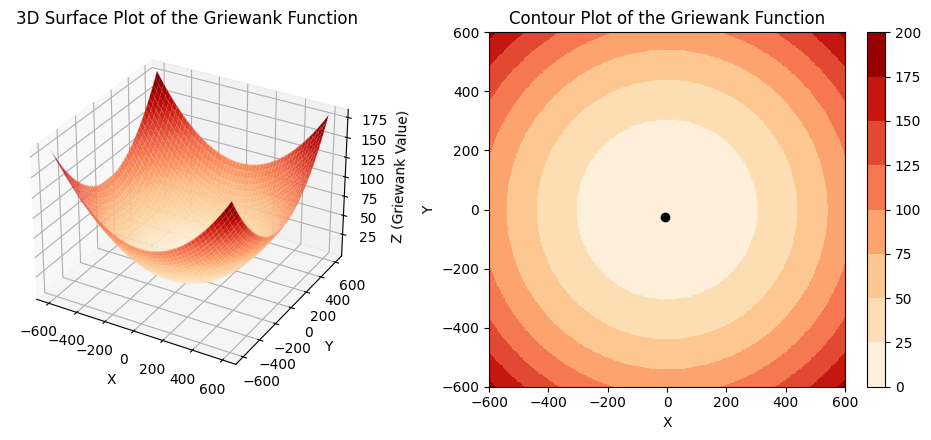

In [5]:
# Run all problems
problem_names = [
    # 'ackley',
    # 'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
    # 'ex8_1_1',
    # # 'ex8_6_2',  # Need to fix threw an error
    # 'kriging_peaks_red010',
    # 'kriging_peaks_red020',
    # 'kriging_peaks_red030',
    # 'kriging_peaks_red050',
    # 'kriging_peaks_red100',
    # 'kriging_peaks_red200',
    # 'kriging_peaks_red500',
    # 'mathopt6',
    # 'quantum',
    # 'rosenbrock',
]

problem_performance = []
trials = 1

for problem_name in problem_names:
    problem = PROBLEMS_BY_NAME[problem_name]
    outputs = run_deeplifting(
        problem,
        trials=trials,
        input_size=1024,
        hi
    )
    results = outputs['final_results']

    # # get the global minimum and the number of hits
    # minimum_value = problem['global_minimum']
    # hit = np.array([np.abs(found_min - minimum_value) for _, _, found_min in results])
    # hits = np.where(hit <= 1e-4, 1, 0).mean()

    # # Create a performance dataframe
    # df = pl.DataFrame(
    #     {
    #         'problem_name': [problem_name] * trials,
    #         'algorithm': ['deeplifting'] * trials,
    #         'hits': hits,
    #     }
    # )
    # problem_performance.append(df)

    # Let's plot the values with UMN colors
    fig = create_optimization_plot(
        problem_name,
        problem,
        results,
        add_contour_plot=True,
        colormap='OrRd'
    )

In [6]:
results

[(-6.280044723382389,
  -26.630664804249477,
  0.18734006369418876,
  'Deeplifting',
  17.896220207214355)]

In [7]:
# fig.subplots_adjust(left=0, right=2, bottom=0, top=2)
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/ackley_introduction.png',
#     bbox_inches='tight',
#     pad_inches=-0.1,
# )

In [8]:
performance_df = pl.concat(problem_performance, how='vertical')

ValueError: cannot concat empty list

In [ ]:
performance_df = (
    performance_df.groupby(['problem_name'])
    .agg(pl.col('hits').mean())
    .rename({'hits': 'success_rate'})
    .sort('problem_name')
)

In [ ]:
performance_df

In [ ]:
problem_name = 'griewank'
problem = PROBLEMS_BY_NAME[problem_name]
problem['bounds'] = [(-3, 3), (-3, 3)]
results = np.array([[0, 0, 0, 0, 0]])

fig = create_optimization_plot(
    problem_name, problem, results, add_contour_plot=True, colormap='OrRd_r'
)

In [ ]:
# Develope automated skip connections
import torch
import torch.nn as nn
import torch.nn.functional as F


class DeepliftingBlock(nn.Module):
    def __init__(self, input_size, output_size, activation='sine'):
        super(DeepliftingBlock, self).__init__()
        # Define the activation
        self.activation = activation

        # Define the Linear layer
        self.linear = nn.Linear(input_size, output_size)

        # Define the Batch Normalization layer
        self.batch_norm = nn.BatchNorm1d(output_size)

    def forward(self, x):
        # Linear layer
        x = self.linear(x)

        # Batch Normalization
        x = self.batch_norm(x)

        # Sine activation function
        if self.activation == 'sine':
            x = torch.sin(x)
        elif self.activation == 'relu':
            x = nn.ReLU()(x)
        elif self.activation == 'LeakyReLU':
            x = nn.LeakyReLU()(x)

        return x


class MLPWithSkipConnections(nn.Module):
    def __init__(
        self, input_size, hidden_sizes, output_size, skip_every_n=1, activation='sine'
    ):
        super(MLPWithSkipConnections, self).__init__()

        self.layers = nn.ModuleList()
        self.skip_every_n = skip_every_n

        # Input layer
        self.layers.append(
            DeepliftingBlock(input_size, hidden_sizes[0], activation=activation)
        )

        # Hidden layers with skip connections
        for i in range(1, len(hidden_sizes)):
            self.layers.append(
                DeepliftingBlock(
                    hidden_sizes[i - 1], hidden_sizes[i], activation=activation
                )
            )
            if i % skip_every_n == 0:
                self.layers.append(
                    DeepliftingBlock(
                        hidden_sizes[i - skip_every_n],
                        hidden_sizes[i],
                        activation=activation,
                    )
                )

        # Output layer
        self.output_layer = DeepliftingBlock(
            hidden_sizes[-1], output_size, activation=activation
        )

    def forward(self, x):
        intermediate_connections = []
        for i, layer in enumerate(self.layers):
            x_new = layer(x)
            if (i + 1) % self.skip_every_n == 0 and i != 0:
                intermediate_connections.append(x_new)
                x = x_new
            else:
                x = x_new

        # Stack the skipped connections and then sum
        # We will also make this configurable
        x = torch.stack(intermediate_connections)
        x = torch.sum(x, axis=0)

        out = self.output_layer(x)
        return out

In [ ]:
input_size = 10
hidden_sizes = [20, 20, 20]
output_size = 2

model = MLPWithSkipConnections(input_size, hidden_sizes, output_size)

# Dummy input of shape (batch_size, input_size)
x = torch.randn(32, input_size)
output = model(x)